In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from math import ceil
from collections import defaultdict
from tqdm.notebook import tqdm       

import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, concatenate, Bidirectional, Dot, Activation, RepeatVector, Multiply, Lambda

from nltk.translate.bleu_score import corpus_bleu

In [2]:
INPUT_DIR = r"D:\VIT\BTech Sem 1\Major_Project\Dataset1\ResizedImages"
OUTPUT_DIR = r"D:\VIT\BTech Sem 1\Major_Project\image-caption-generator-denseNet"

In [3]:
model = DenseNet121(weights="imagenet")

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [4]:

base_model = DenseNet121(weights="imagenet")
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

image_features = {}

img_dir = os.path.join(INPUT_DIR)

for img_name in tqdm(os.listdir(img_dir)):
    
    img_path = os.path.join(img_dir, img_name)
    image = load_img(img_path, target_size=(224, 224))
    
    image = img_to_array(image)
    
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    image = preprocess_input(image)
    
    image_feature = model.predict(image, verbose=0)
    
    image_id = img_name.split('.')[0]
    
    image_features[image_id] = image_feature


  0%|          | 0/8091 [00:00<?, ?it/s]

In [5]:
pickle.dump(image_features, open(os.path.join(OUTPUT_DIR, 'img_features_densenet.pkl'), 'wb'))

In [3]:
pickle_file_path = r"D:\VIT\BTech Sem 1\Major_Project\image-caption-generator-denseNet\img_features_densenet.pkl"
with open(pickle_file_path, 'rb') as file:
    loaded_features = pickle.load(file)

# Loading Caption Data

In [4]:
with open(os.path.join(r'D:\VIT\BTech Sem 1\Major_Project\Dataset1\captions.txt'), 'r') as file:
    next(file)
    captions_doc = file.read()

In [5]:
image_to_captions_mapping = defaultdict(list)

for line in tqdm(captions_doc.split('\n')):
    
    tokens = line.split(',')
    if len(tokens) < 2:
        continue
    image_id, *captions = tokens
    
    image_id = image_id.split('.')[0]
    
    caption = " ".join(captions)
    
    image_to_captions_mapping[image_id].append(caption)

total_captions = sum(len(captions) for captions in image_to_captions_mapping.values())
print("Total number of captions:", total_captions)

  0%|          | 0/40456 [00:00<?, ?it/s]

Total number of captions: 40455


In [6]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
           
            caption = captions[i]
            caption = caption.lower()
            
            caption = ''.join(char for char in caption if char.isalpha() or char.isspace())
         
            caption = caption.replace('\s+', ' ')
            
            caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word)]) + ' endseq'
            captions[i] = caption

In [7]:
image_to_captions_mapping['1026685415_0431cbf574']

['A black dog carries a green toy in his mouth as he walks through the grass .',
 'A black dog carrying something through the grass .',
 'A black dog has a blue toy in its mouth .',
 'A dog in grass with a blue item in his mouth .',
 'A wet black dog is carrying a green toy through the grass .']

In [8]:
clean(image_to_captions_mapping)

In [9]:
image_to_captions_mapping['1026685415_0431cbf574']

['startseq a black dog carries a green toy in his mouth as he walks through the grass endseq',
 'startseq a black dog carrying something through the grass endseq',
 'startseq a black dog has a blue toy in its mouth endseq',
 'startseq a dog in grass with a blue item in his mouth endseq',
 'startseq a wet black dog is carrying a green toy through the grass endseq']

In [10]:
all_captions = [caption for captions in image_to_captions_mapping.values() for caption in captions]

In [11]:
all_captions[:10]

['startseq a child in a pink dress is climbing up a set of stairs in an entry way endseq',
 'startseq a girl going into a wooden building endseq',
 'startseq a little girl climbing into a wooden playhouse endseq',
 'startseq a little girl climbing the stairs to her playhouse endseq',
 'startseq a little girl in a pink dress going into a wooden cabin endseq',
 'startseq a black dog and a spotted dog are fighting endseq',
 'startseq a black dog and a tricolored dog playing with each other on the road endseq',
 'startseq a black dog and a white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

In [13]:
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

In [14]:
max_caption_length = max(len(tokenizer.texts_to_sequences([caption])[0]) for caption in all_captions)
vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary Size:", vocab_size)
print("Maximum Caption Length:", max_caption_length)

Vocabulary Size: 8781
Maximum Caption Length: 37


# Train Test Split

In [15]:
image_ids = list(image_to_captions_mapping.keys())

split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [16]:
def data_generator(data_keys, image_to_captions_mapping, features, tokenizer, max_caption_length, vocab_size, batch_size):
   
    X1_batch, X2_batch, y_batch = [], [], []
    
    batch_count = 0

    while True:
        
        for image_id in data_keys: 
            
            captions = image_to_captions_mapping[image_id]

            for caption in captions:
                
                caption_seq = tokenizer.texts_to_sequences([caption])[0]

                for i in range(1, len(caption_seq)):
                    
                    in_seq, out_seq = caption_seq[:i], caption_seq[i]

                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]

                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X1_batch.append(features[image_id][0])  
                    X2_batch.append(in_seq) 
                    y_batch.append(out_seq)  

                   
                    batch_count += 1

                    if batch_count == batch_size:
                        X1_batch, X2_batch, y_batch = np.array(X1_batch), np.array(X2_batch), np.array(y_batch)
                        yield [X1_batch, X2_batch], y_batch
                        X1_batch, X2_batch, y_batch = [], [], []
                        batch_count = 0

In [17]:
from tensorflow.keras.layers import Input, Dropout, Dense, RepeatVector, Bidirectional, LSTM, Embedding, Dot, Activation, Lambda, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf

dense_feature_size = 1024

inputs1 = Input(shape=(dense_feature_size,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
fe2_projected = RepeatVector(max_caption_length)(fe2)
fe2_projected = Bidirectional(LSTM(256, return_sequences=True))(fe2_projected)

inputs2 = Input(shape=(max_caption_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = Bidirectional(LSTM(256, return_sequences=True))(se2)

attention = Dot(axes=[2, 2])([fe2_projected, se3])  # Calculate attention scores

attention_scores = Activation('softmax')(attention)

attention_context = Lambda(lambda x: tf.einsum('ijk,ijl->ikl', x[0], x[1]))([attention_scores, se3])

context_vector = tf.reduce_sum(attention_context, axis=1)

decoder_input = concatenate([context_vector, fe2], axis=-1)
decoder1 = Dense(256, activation='relu')(decoder_input)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [18]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import ceil

base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

def extract_features(images):
    return base_model.predict(images)

epochs = 50
batch_size = 32

steps_per_epoch = ceil(len(train) / batch_size)
validation_steps = ceil(len(test) / batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    
    train_generator = data_generator(
        train, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size
    )
    test_generator = data_generator(
        test, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size
    )
    
    model.fit(
        train_generator,
        epochs=1,
        steps_per_epoch=steps_per_epoch,
        validation_data=test_generator,
        validation_steps=validation_steps,
        verbose=1
    )


Epoch 1/50
228/228 [==============================] - 196s 816ms/step - loss: 5.8397 - val_loss: 5.5837
Epoch 2/50
228/228 [==============================] - 229s 1s/step - loss: 4.7294 - val_loss: 5.6678
Epoch 3/50
228/228 [==============================] - 215s 944ms/step - loss: 4.3790 - val_loss: 5.6667
Epoch 4/50
228/228 [==============================] - 216s 947ms/step - loss: 4.0746 - val_loss: 5.6507
Epoch 5/50
228/228 [==============================] - 238s 1s/step - loss: 3.8101 - val_loss: 5.6637
Epoch 6/50
228/228 [==============================] - 258s 1s/step - loss: 3.5310 - val_loss: 5.8946
Epoch 7/50
228/228 [==============================] - 632s 3s/step - loss: 3.2739 - val_loss: 6.0271
Epoch 8/50
228/228 [==============================] - 635s 3s/step - loss: 3.0365 - val_loss: 6.2940
Epoch 9/50
228/228 [==============================] - 635s 3s/step - loss: 2.8101 - val_loss: 6.7826
Epoch 10/50
228/228 [==============================] - 644s 3s/step - loss: 2.6083

In [19]:
model.save(OUTPUT_DIR+'/DenseNetmodel.h5')

# Captions Generation

In [20]:
def get_word_from_index(index, tokenizer):
    return next((word for word, idx in tokenizer.word_index.items() if idx == index), None)

In [21]:
def predict_caption(model, image_features, tokenizer, max_caption_length):
    
    caption = 'startseq'
    
    for _ in range(max_caption_length):
        
        sequence = tokenizer.texts_to_sequences([caption])[0]
        
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
       
        yhat = model.predict([image_features, sequence], verbose=0)
        
        predicted_index = np.argmax(yhat)
        
        predicted_word = get_word_from_index(predicted_index, tokenizer)
        
        
        caption += " " + predicted_word
        
        
        if predicted_word is None or predicted_word == 'endseq':
            break
    
    return caption

In [22]:
actual_captions_list = []
predicted_captions_list = []

for key in tqdm(test):
    
    actual_captions = image_to_captions_mapping[key]
    predicted_caption = predict_caption(model, loaded_features[key], tokenizer, max_caption_length)
    
    actual_captions_words = [caption.split() for caption in actual_captions]
    
    predicted_caption_words = predicted_caption.split()
    
    actual_captions_list.append(actual_captions_words)
    predicted_captions_list.append(predicted_caption_words)

print("BLEU-1: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.519030
BLEU-2: 0.299039


# Predicting captions for Images

In [23]:
def generate_caption(image_name):
    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join(INPUT_DIR, image_name)
    image = Image.open(img_path)
    captions = image_to_captions_mapping[image_id]
    print('Original Captions:')
    for caption in captions:
        print(caption)
   
    y_pred = predict_caption(model, loaded_features[image_id], tokenizer, max_caption_length)
    print('Predicted Caption:')
    print(y_pred)
    plt.imshow(image)

Original Captions:
startseq a black and white dog is chasing a ball on an open plane endseq
startseq a black and white dog is running through a grassy area endseq
startseq a black and white dog runs on a dry yellow field of grass endseq
startseq a dog is running towards a ball endseq
startseq a dog runs through a field chasing a ball endseq
Predicted Caption:
startseq a brown and white dug jumping up to catch a frisbee while an audience watches endseq


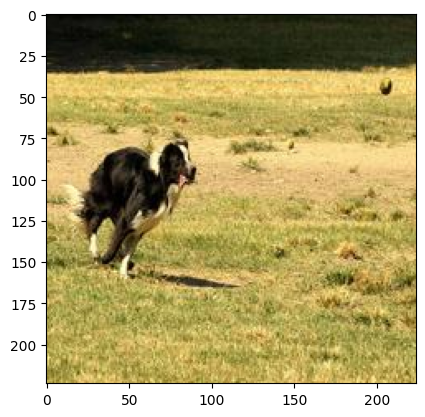

In [24]:
generate_caption("895502702_5170ada2ee.jpg")

Original Captions:
startseq a boy in blue shorts slides down a slide into a pool endseq
startseq a boy in blue swimming trunks slides down a yellow slide into a wading pool with inflatable toys floating in the water endseq
startseq a boy rides down a slide into a small backyard pool endseq
startseq a boy sliding down a slide into a pool with colorful tubes endseq
startseq a child is falling off a slide onto colored balloons floating on a pool of water endseq
Predicted Caption:
startseq a boy rides down a slide into a small backyard pool endseq


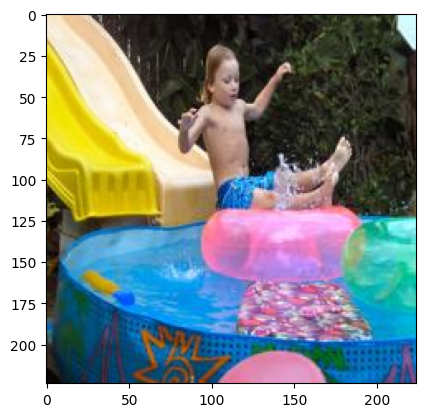

In [25]:
generate_caption("1077546505_a4f6c4daa9.jpg")

Original Captions:
startseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl endseq
startseq a little girl is sitting in front of a large painted rainbow endseq
startseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it endseq
startseq there is a girl with pigtails sitting in front of a rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
Predicted Caption:
startseq a little girl covered in paint sits in front of a painted rainbow with her in a bowl endseq


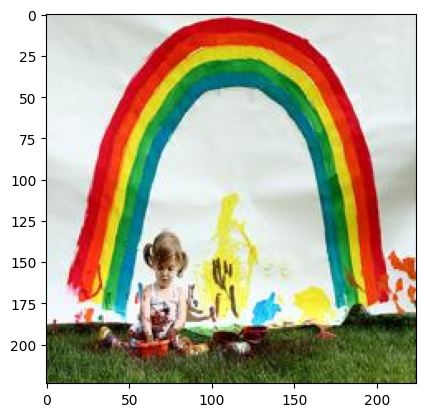

In [26]:
generate_caption("1002674143_1b742ab4b8.jpg")

Original Captions:
startseq a man is standing in front of a skyscraper endseq
startseq a man stands in front of a skyscraper endseq
startseq a man stands in front of a very tall building endseq
startseq behind the man in a red shirt stands a large skyscraper endseq
startseq there is a skyscraper in the distance with a man walking in front of the camera endseq
Predicted Caption:
startseq a man is standing in front of a skyscraper endseq


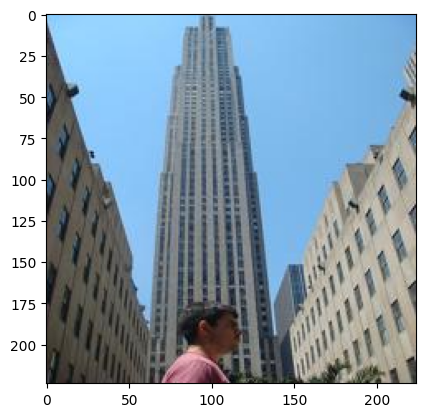

In [27]:
generate_caption("1032460886_4a598ed535.jpg")

Original Captions:
startseq a woman crouches near three dogs in a field endseq
startseq three dogs are playing on grassy hill with a blue sky endseq
startseq three dogs are standing in the grass and a person is sitting next to them endseq
startseq three dogs on a grassy hill endseq
startseq three dogs stand in a grassy field while a person kneels nearby endseq
Predicted Caption:
startseq three dogs are standing in the grass and a person is sitting next to them endseq


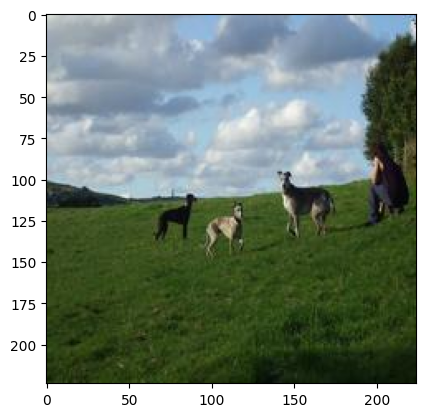

In [28]:
generate_caption("1032122270_ea6f0beedb.jpg")